In [234]:
import pandas as pd
import nltk

In [235]:
names_char = ['Wikipedia movie ID',
          'Freebase movie ID',
          'Movie release date',
          'Character name',
          'Actor date of birth',
          'Actor gender',
          'Actor height',
          'Actor ethnicity',
          'Actor name',
          'Actor age at movie release',
          'Freebase character/actor map ID',
          'Freebase character ID',
          'Freebase actor ID']

characters_metadata = pd.read_csv('../data/character.metadata.tsv', sep='\t', names = names_char)

In [236]:
characters_metadata

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [237]:
characters_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height                     154824 non-null  float64
 7   Actor ethnicity                  106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [238]:
# Percentage of nulls in character name
characters_metadata['Character name'].isna().sum() / characters_metadata.shape[0] * 100

57.22048776374679

In [239]:
# Percentage of nulls in actor name
characters_metadata['Actor name'].isna().sum() / characters_metadata.shape[0] * 100

0.2724837963117055

In [240]:
# Replace by cleaned dataset of Salim
names_mov = ['Wikipedia movie ID',
             'Freebase movie ID',
             'Movie name',
             'Movie release date',
             'Movie box office revenue',
             'Movie runtime',
             'Movie languages',
             'Movie countries',
             'Movie genres']

movies_metadata = pd.read_csv('../data/movie.metadata.tsv', sep='\t')

In [241]:
movies_metadata

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [242]:
movies_metadata['Movie box office revenue'].isna().sum()

73340

In [243]:
movies_metadata['Movie release year'] = movies_metadata['Movie release date'].astype(str).str[:4]
movies_metadata = movies_metadata[movies_metadata["Movie release year"].str.contains("nan") == False]
movies_metadata['Movie release year'] = movies_metadata['Movie release year'].apply(lambda x: int(x))

/var/folders/8l/38mw0fgd64x6gy7hbrcdfb1r0000gn/T/ipykernel_48832/262737790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['Movie release year'] = movies_metadata['Movie release year'].apply(lambda x: int(x))


In [244]:
nans = movies_metadata[movies_metadata['Movie box office revenue'].isna()]

In [245]:
nans

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992


In [246]:
box = pd.read_csv('../data/boxoffice.csv', sep=',')

In [247]:
movies_metadata.set_index(['Movie name','Movie release year'])
box.set_index(['title','year'])
movies_metadata['Movie box office revenue'] = movies_metadata['Movie box office revenue'].fillna(box['lifetime_gross'])

/var/folders/8l/38mw0fgd64x6gy7hbrcdfb1r0000gn/T/ipykernel_48832/808817055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['Movie box office revenue'] = movies_metadata['Movie box office revenue'].fillna(box['lifetime_gross'])


In [248]:
movies_metadata['Movie box office revenue'].isna().sum()

53718

In [249]:
movies_metadata.reset_index()

,index,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,760507625.0,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,2,28463795,/m/0crgdbh,Brun bitter,1988,700059566.0,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,3,9363483,/m/0285_cd,White Of The Eye,1987,678681680.0,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,4,261236,/m/01mrr1,A Woman in Flames,1983,659363944.0,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983
...,...,...,...,...,...,...,...,...,...,...,...
74834,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011
74835,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011
74836,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972
74837,81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992


In [250]:
new = nans.merge(box, left_on=['Movie name','Movie release year'], right_on = ['title','year'], how='inner', suffixes=('_1', '_2'))

In [251]:
new

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year,rank,title,studio,lifetime_gross,year
0,21926710,/m/05p45cv,White on Rice,2009,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009,11474,White on Rice,Vari.,69171,2009
1,7460227,/m/0kv80y,The Bridge,2006-09-01,NaN,69.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2006,10047,The Bridge,FStr.,179780,2006
2,4953051,/m/0cwvf3,The Bridge,2006,NaN,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0jtdp"": ""Documentary""}",2006,10047,The Bridge,FStr.,179780,2006
3,5696825,/m/0d_ng1,The Dark Half,1993-04-23,NaN,122.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/060__y"": ""Film adaptation"", ""/m/03npn"": ""...",1993,4540,The Dark Half,Orion,10611160,1993
4,4069274,/m/0bghc4,When Will I Be Loved,2004-09-10,NaN,81.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3n16"": ""Erotic Drama"", ""/m/02js9"": ""Er...",2004,10226,When Will I Be Loved,IFC,159429,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,1430127,/m/050xcx,Small Faces,1996-04-05,NaN,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom"", ""/m/06q1r"": ""Sc...","{""/m/07s9rl0"": ""Drama"", ""/m/01j1n2"": ""Coming o...",1996,10265,Small Faces,Oct.,155239,1996
2038,3592692,/m/09nl36,Inside Man,2006-03-16,NaN,128.0,"{""/m/012v8"": ""Albanian language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2006,815,Inside Man,Uni.,88513495,2006
2039,9271903,/m/0282j29,Trois,2000,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",2000,7469,Trois,Rain.,1161843,2000
2040,4037444,/m/0bdtyw,Producing Adults,2004,NaN,100.0,"{""/m/01gp_d"": ""Finnish Language""}","{""/m/02vzc"": ""Finland"", ""/m/0d0vqn"": ""Sweden""}","{""/m/0hn10"": ""LGBT"", ""/m/03q4nz"": ""World cinem...",2004,15644,Producing Adults,Wlfe.,935,2004


In [252]:
new = new.drop('rank', axis = 1)
new = new.drop('studio', axis = 1)
new = new.drop('year', axis = 1)
new = new.drop('title', axis = 1)
new = new.drop('Movie box office revenue', axis = 1)

In [253]:
new.rename(columns = {'lifetime_gross': 'Movie box office revenue'})

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year,Movie box office revenue
0,21926710,/m/05p45cv,White on Rice,2009,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009,69171
1,7460227,/m/0kv80y,The Bridge,2006-09-01,69.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2006,179780
2,4953051,/m/0cwvf3,The Bridge,2006,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0jtdp"": ""Documentary""}",2006,179780
3,5696825,/m/0d_ng1,The Dark Half,1993-04-23,122.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/060__y"": ""Film adaptation"", ""/m/03npn"": ""...",1993,10611160
4,4069274,/m/0bghc4,When Will I Be Loved,2004-09-10,81.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3n16"": ""Erotic Drama"", ""/m/02js9"": ""Er...",2004,159429
...,...,...,...,...,...,...,...,...,...,...
2037,1430127,/m/050xcx,Small Faces,1996-04-05,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom"", ""/m/06q1r"": ""Sc...","{""/m/07s9rl0"": ""Drama"", ""/m/01j1n2"": ""Coming o...",1996,155239
2038,3592692,/m/09nl36,Inside Man,2006-03-16,128.0,"{""/m/012v8"": ""Albanian language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2006,88513495
2039,9271903,/m/0282j29,Trois,2000,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",2000,1161843
2040,4037444,/m/0bdtyw,Producing Adults,2004,100.0,"{""/m/01gp_d"": ""Finnish Language""}","{""/m/02vzc"": ""Finland"", ""/m/0d0vqn"": ""Sweden""}","{""/m/0hn10"": ""LGBT"", ""/m/03q4nz"": ""World cinem...",2004,935


In [254]:
movies_metadata['Movie box office revenue'].isna().sum() / movies_metadata.shape[0] * 100

71.77808361950319

In [255]:
movie_to_chars = characters_metadata.merge(movies_metadata, on='Wikipedia movie ID', how='inner', suffixes=('_1', '_2')).set_index('Wikipedia movie ID')

In [256]:
movie_to_chars.head(20)

,Freebase movie ID_1,Movie release date_1,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,...,Freebase actor ID,Freebase movie ID_2,Movie name,Movie release date_2,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,...,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,...,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,...,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,...,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,...,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,...,/m/0418ft,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,...,/m/06lj1m,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,...,/m/0bgcht7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,...,/m/0ks8b0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001


In [257]:
movie_to_chars = movie_to_chars.dropna(subset=['Character name'])

In [258]:
movie_to_chars.head(20)

,Freebase movie ID_1,Movie release date_1,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,...,Freebase actor ID,Freebase movie ID_2,Movie name,Movie release date_2,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Movie release year
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,...,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,...,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,...,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,...,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,...,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,...,/m/0418ft,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,...,/m/06lj1m,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaN,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,...,/m/0bgcht7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,...,/m/0ks8b0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001


In [259]:
import json
with open('../data/tvtropes.clusters.txt') as f:
    d = []
    for row in f.readlines():
        t, json_data = row.split('\t')
        data = json.loads(json_data)
        data['type'] = t
        d.append(data)

tv_tropes_df = pd.DataFrame(d)
tv_tropes_df.set_index("id", inplace=True)

In [260]:
tv_tropes_df.head(10)

,char,movie,actor,type
id,,,,
/m/0jy9q0,Professor Philip Brainard,Flubber,Robin Williams,absent_minded_professor
/m/02vchl3,Professor Keenbean,Richie Rich,Michael McShane,absent_minded_professor
/m/0k6fkc,Dr. Reinhardt Lane,The Shadow,Ian McKellen,absent_minded_professor
/m/0k6_br,Dr. Harold Medford,Them!,Edmund Gwenn,absent_minded_professor
/m/0k3rhh,Daniel Jackson,Stargate,James Spader,absent_minded_professor
/m/0jzx78,Indiana Jones,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford,adventurer_archaeologist
/m/0k294p,Indiana Jones,Indiana Jones and the Raiders of the Lost Ark,Harrison Ford,adventurer_archaeologist
/m/0jzx9b,Indiana Jones,Indiana Jones and the Temple of Doom,Harrison Ford,adventurer_archaeologist
/m/0k5yzc,Evelyn Carnahan-O'Connell,The Mummy,Rachel Weisz,adventurer_archaeologist


In [261]:
character_to_type = tv_tropes_df.merge(characters_metadata, left_index=True, right_on='Freebase character/actor map ID', how='inner')

In [262]:
character_to_type.head()

,char,movie,actor,type,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
242478,Professor Philip Brainard,Flubber,Robin Williams,absent_minded_professor,1344253,/m/04vcfx,1997-11-26,Professor Philip Brainard,1951-07-21,M,1.702,NaN,Robin Williams,46.0,/m/0jy9q0,/m/0cls20k,/m/0dzf_
248310,Professor Keenbean,Richie Rich,Michael McShane,absent_minded_professor,1486573,/m/0557n3,1994-12-21,Professor Keenbean,1955-06-25,M,NaN,NaN,Michael McShane,39.0,/m/02vchl3,/m/0h6dygh,/m/05tkfc
243448,Dr. Reinhardt Lane,The Shadow,Ian McKellen,absent_minded_professor,5991505,/m/0fjjjh,1994-07-01,Dr. Reinhardt Lane,1939-05-25,M,1.800,NaN,Ian McKellen,55.0,/m/0k6fkc,/m/0gynqd6,/m/03ym1
267015,Dr. Harold Medford,Them!,Edmund Gwenn,absent_minded_professor,605676,/m/02vt5c,1954-06-16,Dr. Harold Medford,1877-09-26,M,NaN,NaN,Edmund Gwenn,NaN,/m/0k6_br,/m/0h5whpq,/m/03bpcj
52857,Daniel Jackson,Stargate,James Spader,absent_minded_professor,28327,/m/070g7,1994-10-28,Daniel Jackson,1960-02-07,M,1.780,NaN,James Spader,34.0,/m/0k3rhh,/m/02qs1z,/m/043js


In [263]:
character_to_type['type'] = character_to_type['type'].apply(lambda x: ' '.join(x.split('_')))

In [264]:
character_to_type.head()


,char,movie,actor,type,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
242478,Professor Philip Brainard,Flubber,Robin Williams,absent minded professor,1344253,/m/04vcfx,1997-11-26,Professor Philip Brainard,1951-07-21,M,1.702,NaN,Robin Williams,46.0,/m/0jy9q0,/m/0cls20k,/m/0dzf_
248310,Professor Keenbean,Richie Rich,Michael McShane,absent minded professor,1486573,/m/0557n3,1994-12-21,Professor Keenbean,1955-06-25,M,NaN,NaN,Michael McShane,39.0,/m/02vchl3,/m/0h6dygh,/m/05tkfc
243448,Dr. Reinhardt Lane,The Shadow,Ian McKellen,absent minded professor,5991505,/m/0fjjjh,1994-07-01,Dr. Reinhardt Lane,1939-05-25,M,1.800,NaN,Ian McKellen,55.0,/m/0k6fkc,/m/0gynqd6,/m/03ym1
267015,Dr. Harold Medford,Them!,Edmund Gwenn,absent minded professor,605676,/m/02vt5c,1954-06-16,Dr. Harold Medford,1877-09-26,M,NaN,NaN,Edmund Gwenn,NaN,/m/0k6_br,/m/0h5whpq,/m/03bpcj
52857,Daniel Jackson,Stargate,James Spader,absent minded professor,28327,/m/070g7,1994-10-28,Daniel Jackson,1960-02-07,M,1.780,NaN,James Spader,34.0,/m/0k3rhh,/m/02qs1z,/m/043js


In [265]:
movie_to_chars_to_type = character_to_type.merge(movies_metadata, on='Wikipedia movie ID', how='inner', suffixes=('_1', '_2'))

In [266]:
movie_to_chars_to_type = movie_to_chars_to_type[['char', 'actor', 'type','movie', 'Movie box office revenue']]

In [267]:
movie_to_chars_to_type.head(11)

,char,actor,type,movie,Movie box office revenue
0,Professor Philip Brainard,Robin Williams,absent minded professor,Flubber,177977226.0
1,Professor Keenbean,Michael McShane,absent minded professor,Richie Rich,38087756.0
2,Dr. Reinhardt Lane,Ian McKellen,absent minded professor,The Shadow,48063435.0
3,Dr. Harold Medford,Edmund Gwenn,absent minded professor,Them!,2200000.0
4,Daniel Jackson,James Spader,absent minded professor,Stargate,196567262.0
5,Indiana Jones,Harrison Ford,adventurer archaeologist,Indiana Jones and the Kingdom of the Crystal S...,786636033.0
6,Indiana Jones,Harrison Ford,adventurer archaeologist,Indiana Jones and the Raiders of the Lost Ark,389925971.0
7,Major Arnold Toht,Ronald Lacey,psycho for hire,Indiana Jones and the Raiders of the Lost Ark,389925971.0
8,Indiana Jones,Harrison Ford,adventurer archaeologist,Indiana Jones and the Temple of Doom,333107271.0
9,Evelyn Carnahan-O'Connell,Rachel Weisz,adventurer archaeologist,The Mummy,415933406.0


In [268]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hind/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [269]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('adventurer archeologist')

{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296}

In [270]:
def get_sentiment(sentence):
    score = sia.polarity_scores(sentence)
    if score['pos'] > score['neg'] and score['neu'] < 0.5: return 1
    elif score['pos'] < score['neg'] and score['neu'] < 0.5: return -1
    else: return 0

In [271]:
sentiment = movie_to_chars_to_type['type'].apply(get_sentiment).to_frame().rename(columns = {"type":"sentiment"})
movie_to_chars_to_type = pd.concat([movie_to_chars_to_type, sentiment],axis=1)

In [272]:
movie_to_chars_to_type

,char,actor,type,movie,Movie box office revenue,sentiment
0,Professor Philip Brainard,Robin Williams,absent minded professor,Flubber,177977226.0,0
1,Professor Keenbean,Michael McShane,absent minded professor,Richie Rich,38087756.0,0
2,Dr. Reinhardt Lane,Ian McKellen,absent minded professor,The Shadow,48063435.0,0
3,Dr. Harold Medford,Edmund Gwenn,absent minded professor,Them!,2200000.0,0
4,Daniel Jackson,James Spader,absent minded professor,Stargate,196567262.0,0
...,...,...,...,...,...,...
496,T. E. Lawrence,Peter O'Toole,warrior poet,Lawrence of Arabia,NaN,0
497,Horton the Elephant,Jim Carrey,warrior poet,Horton Hears a Who!,297138014.0,0
498,Chico,Horst Buchholz,young gun,The Magnificent Seven,NaN,-1
499,Colorado Ryan,Ricky Nelson,young gun,Rio Bravo,NaN,-1


In [273]:
# Not sure if to use mean bcz we don't have all the characters
movie_to_chars_to_type.set_index('movie')
grouped = movie_to_chars_to_type.groupby('movie').apply(lambda x: pd.Series({
    'sentiment': x['sentiment'].median(),
    'revenue': x['Movie box office revenue'].median()
}))



In [274]:
grouped = grouped.dropna(subset=['revenue'])
grouped

,sentiment,revenue
movie,,
28 Days Later,0.0,82719885.0
30 Minutes or Less,0.0,40000000.0
3:10 to Yuma,0.0,70016220.0
50 First Dates,0.0,196482882.0
8mm,0.0,96618699.0
...,...,...
You Kill Me,0.0,3382515.0
Young Guns II,-0.5,44143410.0
Your Highness,0.0,24856478.0


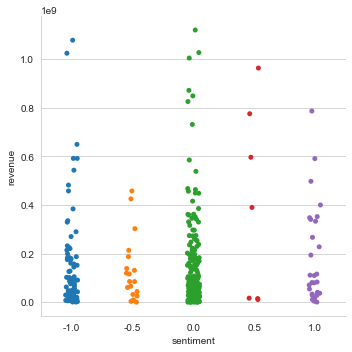

In [275]:
import seaborn as sns

# not sure about which plot to use
sns.catplot(data=grouped, x="sentiment", y="revenue")